In [45]:
import os
import cv2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [46]:
image_directory = "/home/rumesh/Plant-Leaf-Identification/mobile captures"
img_path = image_directory + "/Image_2c.png"
img_path

'/home/rumesh/Plant-Leaf-Identification/mobile captures/Image_2c.png'

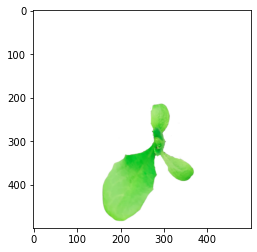

In [47]:
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

(500, 500)

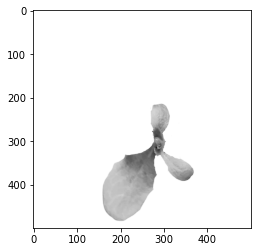

In [48]:
gray_image = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
plt.imshow(gray_image,cmap='Greys_r')
gray_image.shape

Image is converted to Gray scale from RGB

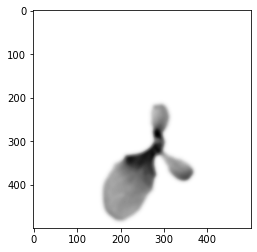

In [49]:
blur_img = cv2.GaussianBlur(gray_image, (25,25),0)
plt.imshow(blur_img,cmap='Greys_r')

# Using Otsu's image thresholding for adaptive image thresholding of Black and white

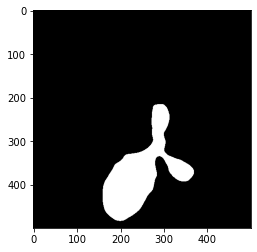

In [50]:
otsu,bw_img = cv2.threshold(blur_img,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
plt.imshow(bw_img,cmap='Greys_r')

In [51]:
#kernel = np.ones((50,50),np.uint8)
#closing = cv2.morphologyEx(im_bw_otsu, cv2.MORPH_CLOSE, kernel)
#plt.imshow(closing,cmap='Greys_r')

# Boundary extraction using Contours

In [52]:
contours, hierarchy = cv2.findContours(bw_img,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

In [53]:
len(contours)

1

In [54]:
cnt_img = contours[0]
len(cnt_img)

398

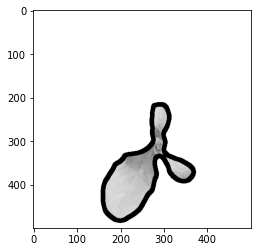

In [55]:
plottedContourImage = cv2.drawContours(gray_image,contours,-1,(0,255,0),10)
plt.imshow(plottedContourImage,cmap="Greys_r")

# Morphological processing is done to extract the area of the leaf

In [56]:
#area = cv2.contourArea(closing_edge)
area = cv2.contourArea(cnt_img)
area

20260.5

In [40]:
perimeter = cv2.arcLength(cnt,True)
perimeter

1591.7585731744766